In [2]:
import numpy as np
import glob as gb
import os
import matplotlib.pyplot as plt
import photonics.fluorescence as fl

%matplotlib notebook

save = False

In [3]:
def getfilename(file):
    # Get name from file
    fname = os.path.basename(file)
    fname = os.path.splitext(fname)[0]
    return fname

def getsampleid(file):
    name = getfilename(file)
    sampleno = name.split('_')[0]
    return sampleno

In [10]:
# Print info.txt file
f = open("./Lifetime/secondAttempt/info.txt","r")
contents = f.read()
f.close()

for row in contents.split("\n"):
    print(row)

0.4a 1ms pump, 100ms period. 8Hz. 250 sweeps. 0.23W.


In [11]:
# select files to analyse
files = gb.glob('./Lifetime/secondAttempt/*.txt')

# Select only T12 and T13
files = [x for x in files if '12' in x or '13' in x]

In [12]:
# Select the required pump
pump = 1
lamp_delay = 0.1

<IPython.core.display.Javascript object>


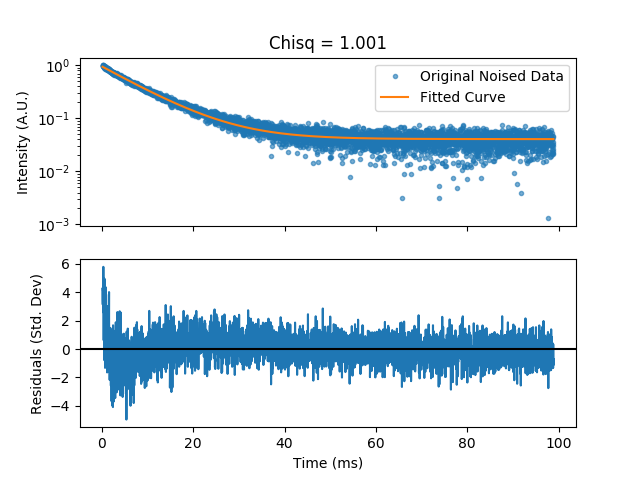

In [16]:
sample = '12_air'
f =  [x for x in files if sample in x]
data = np.genfromtxt(fname=f[0], delimiter=',', dtype=float, skip_header=10, usecols=(0,1))
x = data[:,0]/1E6  # Convert time from us to ms
y = data[:,1]

x = fl.shift_time(x, length=pump+lamp_delay)
x, y = fl.reject_time(x, y, reject_start=0.1, reject_end=0)
y = fl.normalise(y, ref='start')

popt = fl.fit_decay(x, y)
fl.plot_decay(x, y, fl.decay_fn, popt);